<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction** 

nsupervised machine learning algorithms, such as clusters analysis or clustering, group unlabeled datasets.[1]

# **Clustering**

Clustering is the process of combining data points in a dataset so that there is a high level of similarity between clusters and a low level of similarity between clusters. Clustering, in its most basic form, is the process of forming subsets or groups from a dataset made up of data points that are really similar to one another and which can be differentiated from each other significantly.[1]


**Why Clustering?**

Consider a dataset about which we know nothing. The result of a clustering algorithm is that it can find groups of objects whose average distance between members or data points is smaller than the distance between members or data points in other clusters[1]

**Application of Clusteriing**

Here are a few real-life examples of how clustering can be applied:[1]
- Customer segmentation: The process of identifying a group of customers with similar behaviour given a large dataset.
- In a network traffic classification, the characteristics of the traffic sources are grouped together. Using clusters, it is easy to classify traffic types.
-Email Filter: This filter divides the data into three sections and then classifies them accordingly.

## **K means clustering**

This algorithm identifies clusters of a given data set based on a certain number of predetermined groupings or “K” groups[1].

The k-means clustering algorithm is used to group unlabelled data into different clusters or subgroups using an unsupervised approach. Surely you must be wondering what the works ‘k’ and ‘means’ in the k-means clustering mean?[1]

To put a stop to all your guesses here, the term ‘k’ stands for the number of clusters that can be created in the process of clustering. For instance, k = 2, we’ll have two clusters, whereas when k=3, we’ll have three clusters, and so on. Due to the fact that k-means clustering uses centroid-based algorithm, the “means” of each cluster is determined by the centroid of the data points. In the working explanation of k-means you will learn about the concept of centroid based algorithm[1]

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set()

### **Data Loading**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv',encoding = 'latin')

### **Data Preprocessing**

In [3]:
data=Train_data

In [4]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])

In [5]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [6]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(data)

In [33]:
MiceImputed.fillna(method = 'ffill', axis = 0)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,cluster_labels,target
0,1.0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.000000,3,1.0
1,2.0,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.000000,2,0.0
2,3.0,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.000000,3,0.0
3,4.0,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0.0,288655.133065,1,1.0
4,5.0,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1.0,425000.000000,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1.0,400000.000000,3,0.0
211,212.0,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1.0,275000.000000,1,0.0
212,213.0,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1.0,295000.000000,3,0.0
213,214.0,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1.0,204000.000000,1,1.0


In [8]:
selected_cols=["gender","ssc_p","ssc_b","hsc_p","hsc_b","hsc_s","degree_p","degree_t","workex","etest_p","specialisation","mba_p","status","salary"]
cluster_data=MiceImputed.loc[:,selected_cols]

In [ ]:
cluster_data

###**Find optimum number of clusters**

In [ ]:
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]


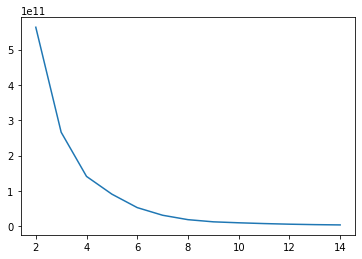

In [ ]:
interties =[]
for c in cluster_range:
  kmeans= KMeans(init='k-means++', n_clusters= c,n_init=100,random_state=0).fit(cluster_data)
  interties.append(kmeans.inertia_)
plt.figure()
plt.plot(cluster_range,interties, )
plt.show()

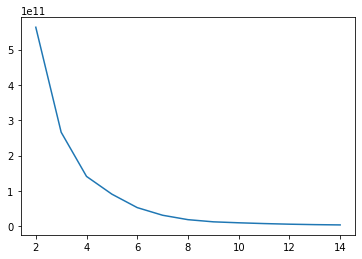

In [ ]:
interties =[]
for c in cluster_range:
  kmeans= KMeans(init='k-means++', n_clusters= c,n_init=100,random_state=0).fit(cluster_data)
  interties.append(kmeans.inertia_)
plt.figure()
plt.plot(cluster_range,interties)
plt.show()

### **Model tranining**

In [ ]:
kmeans = KMeans(n_clusters=4)
cluster_data["Cluster"] = kmeans.fit_predict(cluster_data)
cluster_data["Cluster"] = cluster_data["Cluster"].astype("int")
print(cluster_data.head())

   gender  ssc_p  ssc_b  hsc_p  ...  mba_p  status         salary  Cluster
0     1.0  67.00    1.0  91.00  ...  58.80     1.0  270000.000000        3
1     1.0  79.33    0.0  78.33  ...  66.28     1.0  200000.000000        0
2     1.0  65.00    0.0  68.00  ...  57.80     1.0  250000.000000        0
3     1.0  56.00    0.0  52.00  ...  59.43     0.0  288655.133065        3
4     1.0  85.80    0.0  73.60  ...  55.50     1.0  425000.000000        1

[5 rows x 15 columns]


In [ ]:
cluster_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Cluster
0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1.0,270000.000000,3
1,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1.0,200000.000000,0
2,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1.0,250000.000000,0
3,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0.0,288655.133065,3
4,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1.0,425000.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1.0,400000.000000,1
211,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1.0,275000.000000,3
212,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1.0,295000.000000,3
213,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1.0,204000.000000,0


### **Scatter plot**

In [ ]:
plt.style.use("seaborn")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x="etest_p", y="specialisation", hue="Cluster", data=cluster_data, height=6)
plt.show()

### **Calculate Accuracy**

## **DBSCAN Clustering**

### **Import Library** 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### **Data Preprocessing**

**Find Missing Data**

In [ ]:
cluster_data.isnull().sum()

In [ ]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

**scale and normalize the dataset**

In [ ]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cluster_data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

**Principal Component Analysis (PCA)**

Now I will implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization:

In [ ]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

### **Model Training**

Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it:

In [ ]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

     sl_no  gender  ssc_p  ssc_b  ...  mba_p  status    salary  cluster
210    211       1   80.6      1  ...  74.49       1  400000.0       -1
211    212       1   58.0      1  ...  53.62       1  275000.0       -1
212    213       1   67.0      1  ...  69.72       1  295000.0       -1
213    214       0   74.0      1  ...  60.23       1  204000.0       -1
214    215       1   62.0      0  ...  60.22       0       NaN        2

[5 rows x 16 columns]


### **Scatter plot**

In [ ]:

clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

## **Agglomerative Clustering**

### **Import library** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Data Preprocessing**

Here we can make clusters based on the Degree passing mars and student filed of the students. So let’s prepare the data accordingly:

In [ ]:
Train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,cluster
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,-1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,-1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,-1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,-1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,-1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,-1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,-1


In [ ]:
Train_data["degree_p"] = Train_data[["degree_p"]]
Train_data["specialisation"] = Train_data[["specialisation"]]
Train_data = Train_data[["degree_p", "specialisation"]]
print(Train_data.head())

### **Model training**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
model.fit(Train_data)
pred = model.fit_predict(Train_data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(Train_data["degree_p"], Train_data["specialisation"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

## **BIRCH Clustering**

### **Model Training**

In [ ]:
from sklearn.cluster import Birch
model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
model.fit(Train_data)
pred = model.predict(Train_data)
plt.scatter(Train_data["degree_p"], Train_data["specialisation"], c=pred, cmap='rainbow', alpha=0.5, edgecolors='b')
plt.show()

### **Mean Shift Clustering**

### **Model Training** 

In [ ]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=2)
model.fit(Train_data)
pred = model.fit_predict(Train_data)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
plt.scatter(Train_data["degree_p"], Train_data["specialisation"], c=pred, cmap='rainbow', alpha=0.9)
plt.show()

## **t-SNE**

### **Import library** 

In [10]:
from sklearn.manifold import TSNE
import plotly.express as px

### **Data Preprocessing**

In [17]:
selected_cols=["gender","ssc_p","ssc_b","hsc_p","hsc_b","hsc_s","degree_p","degree_t","workex","etest_p","mba_p","status","salary"]
cluster_data=MiceImputed.loc[:,selected_cols]

In [ ]:
MiceImputed

### **Model Training**

In [21]:

tsne = TSNE(n_components=2, perplexity=20, random_state=1000)
projections = tsne.fit_transform(cluster_data)

fig = px.scatter(
    projections, x=0, y=1,
    color=MiceImputed.specialisation, labels={'color': 'specialisation'}
)
fig.show()

## **Hierarchical Clustering**

follows two approaches Divisive and Agglomerative. Each observation is considered a cluster and similar data points are grouped until they are fused, while Divisive works in the opposite direction[1]

### **Import Library** 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Data Preprocessing** 

In [ ]:
np.unique(MiceImputed.specialisation,return_counts=True)


In [25]:
# Import the whiten function
from scipy.cluster.vq import whiten
scaled_data = whiten(MiceImputed.to_numpy())


In [ ]:
pd.DataFrame(scaled_data).describe()

In [27]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage
# Use the linkage() function
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')

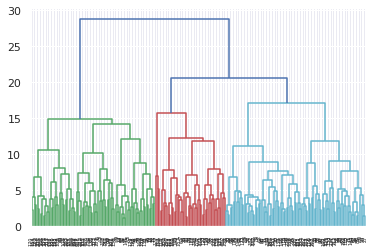

In [28]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
dn = dendrogram(distance_matrix)
# Display the dendogram
plt.show()

In [30]:
# Assign cluster labels
MiceImputed['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

In [ ]:
MiceImputed

KeyError: ignored

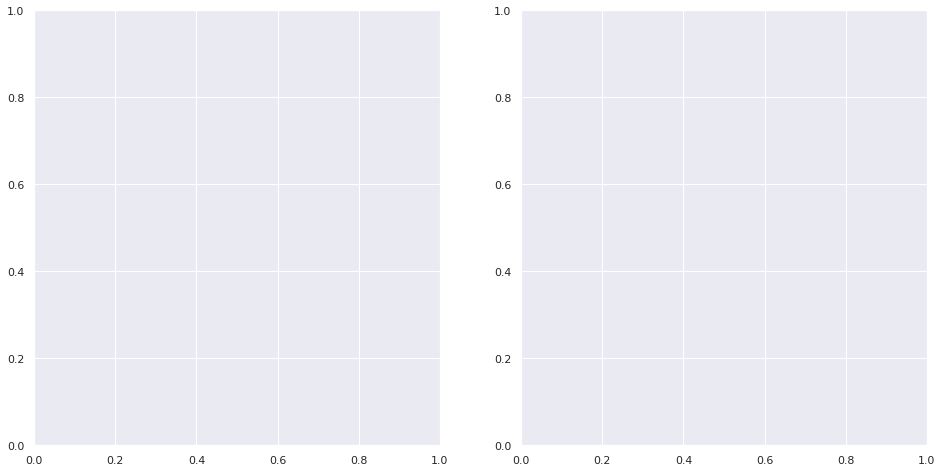

In [34]:
MiceImputed['target'] = MiceImputed.specialisation
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(MiceImputed[0], MiceImputed[1], c=MiceImputed['target'])
axes[1].scatter(MiceImputed[0], MiceImputed[1], c=MiceImputed['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Hierarchical', fontsize=18)

## **Fuzzy C means Clustering**

Although the workings of the FCM algorithm are almost identical to those of the K-means clustering algorithm, the main difference is that a data point can be placed in more than one cluster.[1]

## **Density-Based Spatial Clustering:**

Suitable for application requiring non-linear structures for clustering, solely based on density.[1]

# **References**

[1-Detailed Introduction To K-Means Clustering In Python](https://usernamejack.medium.com/detailed-introduction-to-k-means-clustering-in-python-d8178d7eb123)

[2-K-Means Clustering in Machine Learning](https://thecleverprogrammer.com/2021/02/16/k-means-clustering-in-machine-learning/)

[3-DBSCAN Clustering in Machine Learning](https://thecleverprogrammer.com/2021/02/03/dbscan-clustering-in-machine-learning/)

[4-Agglomerative Clustering using Python](https://thecleverprogrammer.com/2021/08/11/agglomerative-clustering-in-machine-learning/)

[5- BIRCH Clustering in Machine Learning](https://thecleverprogrammer.com/2021/03/15/birch-clustering-in-machine-learning/)

[6-Mean Shift Clustering in Machine Learning](https://thecleverprogrammer.com/2021/09/29/mean-shift-clustering-in-machine-learning/)

[7-Hierarchical Clustering in Python](https://medium.com/swlh/hierarchical-clustering-in-python-9646cfddee35)